In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [67]:
# データの準備（二値分類のみ可なので、100行までのデータを指定かつ、特徴量も2つ選択）

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

std = StandardScaler()
X = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
X_train.shape

(70, 2)

In [69]:
y_train.shape

(70,)

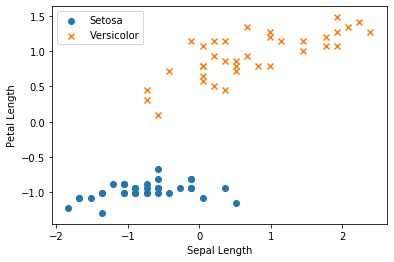

In [70]:
# 変換前のデータをプロット

fig, ax = plt.subplots()
    
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker = 'o', label = 'Setosa')
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker = 'x', label = 'Versicolor')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
    
ax.legend(loc = 'best')

plt.show()

In [71]:
# インスタンスを作成
svc = SVC(kernel = 'linear', C = 1e6)
    
# 学習をさせる（モデルの作成）
svc.fit(X_train, y_train)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

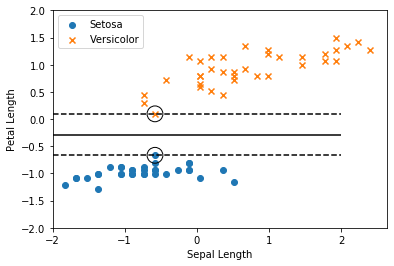

In [72]:
# プロットする
fig, ax = plt.subplots()
    
# 先ほどを同じプロットをする
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker = 'o', label = 'Setosa')
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker = 'x', label = 'Versicolor')

# マージンの線の長さを調整
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0

# 決定境界とマージンをプロット（levels：マージンと決定境界の位置）
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    
xy = np.vstack([xx.ravel(), yy.ravel()]).T
p = svc.decision_function(xy).reshape(100, 100)  
ax.contour(xx, yy, p, colors = 'k', levels = [-1, 0, 1], alpha = 1, linestyles = ['--', '-', '--'])

# サポートベクタをプロット（s：〇の大きさ）
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 250, facecolors = 'none', edgecolors = 'black')
    
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
    
ax.legend(loc = 'best')
    
plt.show()

In [73]:
y_pred = svc.predict(X_test)

In [74]:
print(y_pred)

[0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1]


In [75]:
print(y_test)

[0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1]


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

